### run tflite model

In [1]:
import numpy as np
import tflite_runtime.interpreter as tflite

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
interpreter = tflite.Interpreter(model_path='./mediapipe/mediapipe/models/face_landmark.tflite')
interpreter.allocate_tensors()

In [3]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [4]:
# Test model on random input data.
input_shape = input_details[0]['shape']
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

In [5]:
# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[[[101.55873    119.98852     -8.568814   ... 141.92824
     65.32629     -0.28193524]]]]


In [6]:
%%timeit
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

40.1 ms ± 3.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
import torch

In [8]:
print("PyTorch version:", torch.__version__)
print("CUDA version:", torch.version.cuda)
print("cuDNN version:", torch.backends.cudnn.version())

PyTorch version: 1.4.0
CUDA version: 10.0
cuDNN version: 7603


In [9]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
from blazeFacemark import BlazeFacemark

net = BlazeFacemark().to(device)
net.load_weights("blazeFacemark.pth")

In [10]:
input_t = torch.from_numpy(input_data).permute((0, 3, 1, 2)).to(device)

In [11]:
with torch.no_grad():
    out = net(input_t)

In [12]:
print(output_data)
print(input_data.shape)

[[[[101.55873    119.98852     -8.568814   ... 141.92824
     65.32629     -0.28193524]]]]
(1, 192, 192, 3)


In [13]:
out

[tensor([[[[101.5587, 119.9885,  -8.5688,  ..., 141.9282,  65.3263,  -0.2819]]]]),
 tensor([[[[-6.2848]]]])]

In [14]:
import cv2
img = cv2.imread("facesample3.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_ori = cv2.resize(img, (192, 192))

In [15]:
img_ori = img_ori[np.newaxis, ...]
input_data = img_ori.astype('float32')
input_data = input_data / 127.5 - 1.0
input_data.shape

(1, 192, 192, 3)

In [16]:
input_data.min()

-0.9607843

In [17]:
interpreter = tflite.Interpreter(model_path='./mediapipe/mediapipe/models/face_landmark.tflite')
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[[[ 92.68286   136.81337    -8.793727  ... 133.37509    85.80666
     -4.7588215]]]]


In [18]:
input_t = torch.from_numpy(input_data).permute((0, 3, 1, 2)).to(device)
with torch.no_grad():
    out = net(input_t)

In [19]:
print(out)

[tensor([[[[ 92.6829, 136.8134,  -8.7937,  ..., 133.3751,  85.8067,  -4.7588]]]]), tensor([[[[53.8997]]]])]


In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

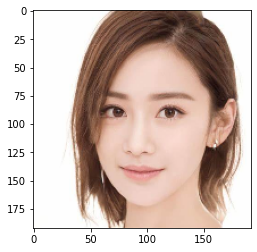

In [21]:
plt.imshow(img_ori.squeeze())

In [22]:
detections = output_data.reshape(-1, 3)

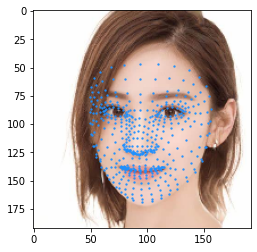

In [23]:
fig, ax = plt.subplots()
ax.imshow(img_ori.squeeze())
ax.scatter(detections[:, 0], detections[:, 1], color ='dodgerblue', alpha=0.8, s = 2)

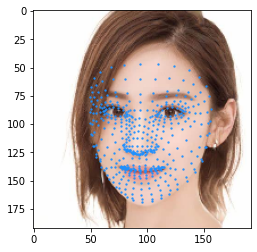

In [24]:
hand_kpts = out[0].reshape(-1, 3)
fig, ax = plt.subplots()
ax.imshow(img_ori.squeeze())
ax.scatter(hand_kpts[:, 0], hand_kpts[:, 1], color ='dodgerblue', alpha=0.8, s = 2)